In [2]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l


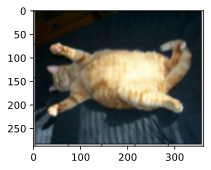

In [3]:
d2l.set_figsize()
img = d2l.Image.open('cat.JPG')
d2l.plt.imshow(img)

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

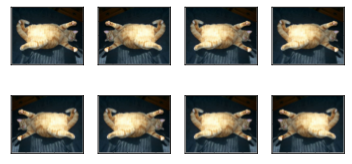

In [5]:
apply( img , torchvision.transforms.RandomHorizontalFlip() )#水平翻转  左右翻转

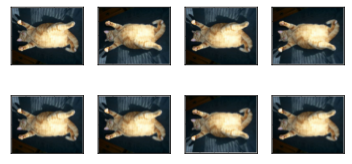

In [6]:
apply( img , torchvision.transforms.RandomVerticalFlip()  )#垂直翻转 上下翻转

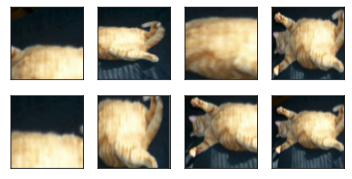

In [7]:
shape_aug = torchvision.transforms.RandomResizedCrop( 
                        ( 200 , 200 ) , scale=( 0.1 , 1 ) , ratio = ( 0.5 , 2 )  )#随机选取原始面积为10%到100%的区域，该区域的宽高比从0.1到1之间取值
                                                                                  #然后放缩到( 200 , 200 )像素
apply( img ,  shape_aug)

## 改变颜色

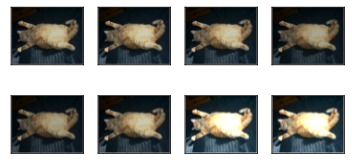

In [8]:
apply( img , torchvision.transforms.ColorJitter( 
        brightness=0.5 , contrast=0 , saturation=0 , hue=0
  ))#   亮度，  对比度 ， 饱和度 ， 色调
  #随机值为原始图像的50%（1−0.5）到150%（1+0.5）之间。

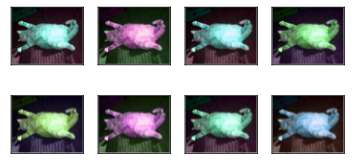

In [9]:
apply( img , torchvision.transforms.ColorJitter( 
        brightness=0 , contrast=0 , saturation=0 , hue=0.5
  ))

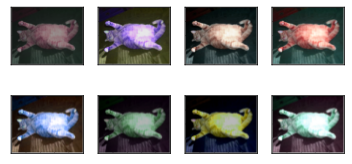

In [10]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5 , contrast=0.5 , saturation=0.5 , hue = 0.5
)
apply( img , color_aug )

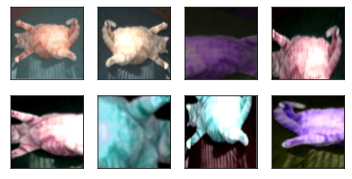

In [11]:
#将多种图像增广的手段结合起来Compose
aug = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip() , 
    shape_aug , 
    color_aug
])
apply( img , aug )

Files already downloaded and verified


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

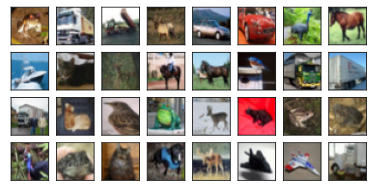

In [12]:
all_images = torchvision.datasets.CIFAR10(train=True, root="../data",
                                          download=True)
d2l.show_images( [all_images[i][0] for i in range(32) ], 4, 8, scale=0.8 )

In [13]:
train_augs = torchvision.transforms.Compose([
     torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor()])

In [14]:
def load_cifar10(is_train, augs, batch_size):
    dataset = torchvision.datasets.CIFAR10(root="../data", train=is_train,
                                           transform=augs, download=False)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                    shuffle=is_train, num_workers=d2l.get_dataloader_workers())
    return dataloader


In [16]:
torch.cuda.is_available()

True